# **Contributions**

Mitch Johnson: I contributed to the following: EDA(Graphs to find the player/game identifiers), Data Pre-processing(Some of the dropping of features, the dummies variable creation, train/test splitting, and the scaling),Model Creation (Logistic Regression Model and Tuning), Verification of the Logistic Regression Model(through Known Dataset), Most of the markdown cell explinations, Analysis, Conclusion, and Recommendations/Next-Steps.

Kevin Morales Rosales: I contributed EDA scatterplots that demonstrate how post-game stats essentially give the models the answer and prevents them from learning. Feature engineering additional features for team leve statistics and normalizing team stats over a period of 5 minuntes from the 10 minute mark and 15 minute mark of the match. Model of choice was Random Forest Classifier witch GridSearchCV to find ideal set up for the models and the dataset.

# Problem Definition

Prepared by: Mitch Johnson, Kevin Morales Rosales

PROJECT SUMMARY

We will attempt to predict the winner or loser of a "League of Legends" game based on the dataset. We will start by using Logistic Regression as our base model as we are trying to predict a binary label (win/lose). "League of Legends" is a computer game by "Riot Games".

PROBLEM STATEMENT

We are trying to predict if Team 1 will win or lose based on statistics from the game data.

DATASET

Dataset found here: https://www.kaggle.com/datasets/fernandorubiogarcia/league-of-legends-high-elo-patch-1016

Highlights for the dataset are as follows:

Instances: 60,156

Attributes: 609

Total number of data points: 36,635,004

# Data Collection

We start by reading the data into a DataFrame.

In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV



df = pd.read_csv("../project/10.16_LeagueOfLegends_Games.csv", delimiter = ";")

df.head()

gameId                                   t1p1_accountId  t1p1_assists  \
0  4747415735  j7A9NCAnShAbuQuEtlPMwVGqUiHAyEUdI_OEe79ToX-gkeI             7   
1  4747759040   LkRqeoIcbTZeArlKA80SnOuMcUhI4tPl_0rkVCKpyepB8g            21   
2  4746336268   IhcGDHrSIFZc3c5g4r_ljnBNfe1bgcBqwg0KwkZdj_q5BA            11   
3  4756259885  TC1II2bhaFaQ4q-jQi_GUxV7rgrRToiBC-3qAy18Melt25A            11   
4  4756423982   JFMI-NomU4kwSVK5T7JvmYlIiTWQFPo47BoKnMRtz_cKNA            11   

   t1p1_ban_champId  t1p1_champId  t1p1_champLevel  \
0               121            25               11   
1               111            37               13   
2               122            89               11   
3                81            89               11   
4                91            25               11   

   t1p1_damageDealtToObjectives  t1p1_damageDealtToTurrets  \
0                           166                          0   
1                          5397                       2879   
2                          3030                       1038   
3                          1253                       1253   
4                           260                        260   

   t1p1_damageSelfMitigated  t1p1_deaths  ...  t2p5_wardsKilled  \
0                     12783            5  ...                 0   
1                      8793            5  ...                 2   
2                     23864            7  ...                 5   
3                     14012            4  ...                 1   
4                      9350            6  ...                 2   

   t2p5_wardsPlaced  gameCreation  gameDuration     gameVersion  platformId  \
0                10  1.596750e+12          1738  10.16.330.9186        EUW1   
1                 6  1.596760e+12          1374  10.16.330.9186        EUW1   
2                13  1.596720e+12          1692  10.16.330.9186        EUW1   
3                 5  1.597160e+12          1383  10.16.330.9186        EUW1   
4                 9  1.597160e+12          1672  10.16.330.9186        EUW1   

   queueId  average_lp  t1_teamId  t1_win  
0      420      3380.4        100       0  
1      420      3284.9        100       1  
2      420      3333.2        100       0  
3      420      3258.1        100       1  
4      420      3116.0        100       0  

[5 rows x 609 columns]

We check to make sure there are no missing values, if there are missing values, we drop them.

In [68]:
df.isnull().sum()

df = df.dropna()

Check the size of the dataframe.

In [69]:
row,columns = df.shape
print(df.shape)

(60107, 609)


We grab some easy general info about the data.

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60107 entries, 0 to 60155
Columns: 609 entries, gameId to t1_win
dtypes: float64(97), int64(470), object(42)
memory usage: 279.7+ MB


# Exploratory Data Analysis

Check for good distribution of classes (Class Imbalance testing)

Class Distribution in Target Variable (t1_win):
t1_win
1    50.325253
0    49.674747
Name: proportion, dtype: float64


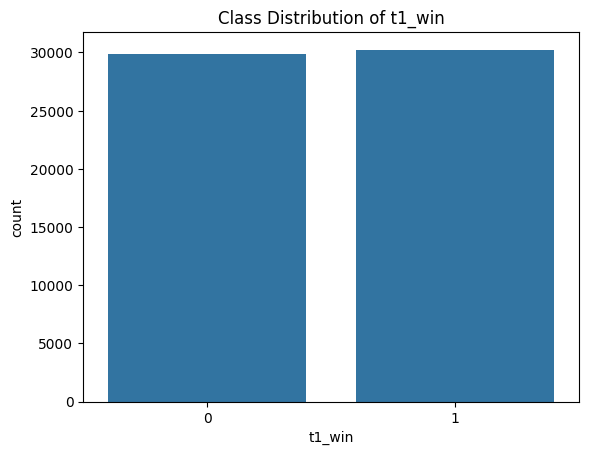

In [71]:
target_dist = df['t1_win'].value_counts(normalize=True) * 100
print("Class Distribution in Target Variable (t1_win):")
print(target_dist)
sns.countplot(x='t1_win', data=df)
plt.title('Class Distribution of t1_win')
plt.show()


First we check gameId to see its uniqueness.

gameId: 60,107 unique / 60,107 total (100.00% unique)


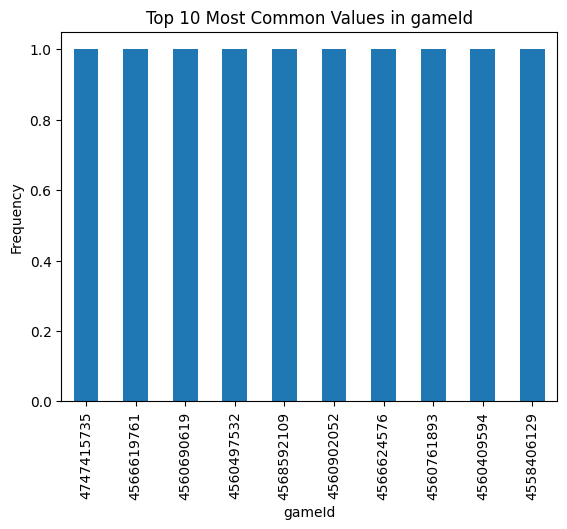

In [72]:
gameId_column = [
    "gameId"
]

for col in gameId_column:
    unique_vals = df[col].nunique()
    total_vals = df[col].shape[0]
    print(f"{col}: {unique_vals:,} unique / {total_vals:,} total ({(unique_vals/total_vals)*100:.2f}% unique)")

    df[col].value_counts().head(10).plot(kind='bar')
    plt.title(f"Top 10 Most Common Values in {col}")
    plt.ylabel("Frequency")
    plt.show()


Because gameID is completely unique to each row(there is no pattern for the model to look for), we will remove this column.

<Axes: xlabel='t1p1_summonerName'>

C:\Users\maype\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 157 (\x9d) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\maype\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 157 (\x9d) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


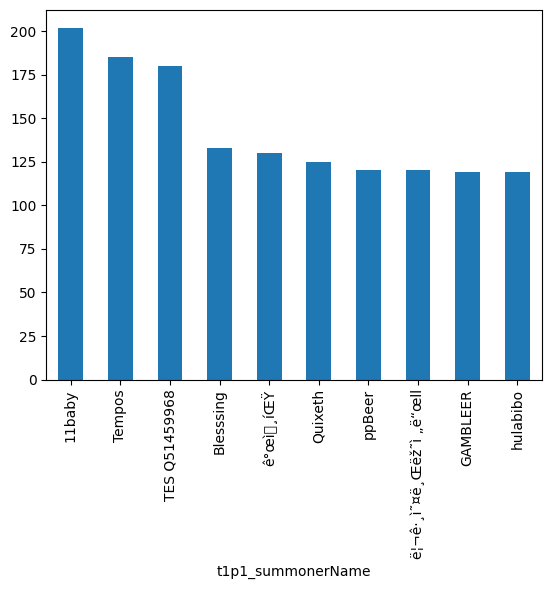

In [73]:
df['t1p1_summonerName'].value_counts().head(10).plot(kind='bar')


This graph shows that summonerName for all players will be repeated in multiple rows but the names of the players will add complexity to the model and noise to our data. So, we will remove the column. This is also bad for generalization.

In [74]:
df.groupby('t1p1_summonerId')['t1_win'].agg(['mean', 'count']).sort_values(by='count', ascending=False).head(10)


mean  count
t1p1_summonerId                                                  
#NAME?                                            0.496112    643
2-ERsTYol6BKg2S6YkSdAWymMxS8jbFjcs0NU8bO8DKlmtE   0.509901    202
UWZq-HNQjD3jvjDvWCcKpC-0AXG-hgckNPdvWSFpUgT7rlM   0.526596    188
GsKHOcDm5NAcg5rINx0VufVDBnOec7iRc1oF7EnNA3UNEUVg  0.510753    186
1ojVDatkP2wFpGuDF5cZcwCIc9WyVKExt7fiu2rkk6HRfkM   0.529730    185
dzuPzDya96UuXkmN0597JnXOFC3Fgu7Bc7SebqrFY_WE9ks   0.479452    146
bhTVo0QEKhbq4zt3kmIBwytjjuhQVvsudXpgkZq1Wzk2-l8   0.481752    137
j1-dJMTIiytQyNLAwdCEL7oXugD0xWX-7pIB7WEX7Fl4sTI   0.451128    133
8ZOPrv5q0mYd1QMnEIYj-j6TJaXv7d_xCV-UzNZo_HyYrA    0.546154    130
QHbkiMKLIDwW57vNp8gplYGcw7O3JM2_ck8tL0iR2uv2WtI   0.531746    126

The summonerId only has a mean win of about .5 linked to most of the Id's so this will also not add useful information to the model for predictions. This is also bad for generalization.

In [75]:
df.groupby('t1p1_accountId')['t1_win'].agg(['mean', 'count']).sort_values(by='count', ascending=False).head(10)

mean  count
t1p1_accountId                                                     
#NAME?                                              0.476589    598
yjEKl049QQ-EffE0r-pI40GJcW9vZxqyM_fpL5r7IhRIvwn...  0.509901    202
4PnREd5vdC06sXhouLBuYRqyoFnXt1gQyGxONkFSRjRHBMo...  0.526596    188
VvET7tZvEPg9vJfVASv3BehO0oYLeJdrdeU12iDQgFytiNr...  0.510753    186
nmj-LPUtevhI9e2HmhMf95wbXtz0scqWVUt3wNijlViX1g      0.529730    185
Cf1URv3eOmhriCsbncfjL2JstZn_tfAAt1eTGroOmttv6QX...  0.479452    146
lrrmJ-tvn94a0yHxAp0JPzVaZIT-4NN6_AMXnIQIJjdWK-7...  0.481752    137
6HHZXGr6FqMC8R798c9dHMHQAaqdjEMYVFyDXLzuIPS4T6H...  0.451128    133
lKJjgnSIB5j-XvOCHYJ7n7681smTiV2akOQKBOSwh66t        0.546154    130
sx4QIG7Q9zOIwbSDc4P5DnnN0QeCDK_lPQAY2gL-Eje1hR7...  0.531746    126

We see the same thing as with SummonerId, we will remove the accountID columns as well. This is also bad for the generalization.

In [76]:
df.groupby('platformId')['t1_win'].agg(['mean', 'count']).sort_values(by='count', ascending=False).head(10)


mean  count
platformId                 
KR          0.503208  28056
EUW1        0.507775  21864
NA1         0.493668  10187

Again the mean is at .5 so the platformId is not likely to help the model.

### **We now check some comparison statistics**

We check kill statistics. (comparision is from "player 1 on team 1" to "player 1 on team 2", this ensures the comparison is done based on the role each player is playing)

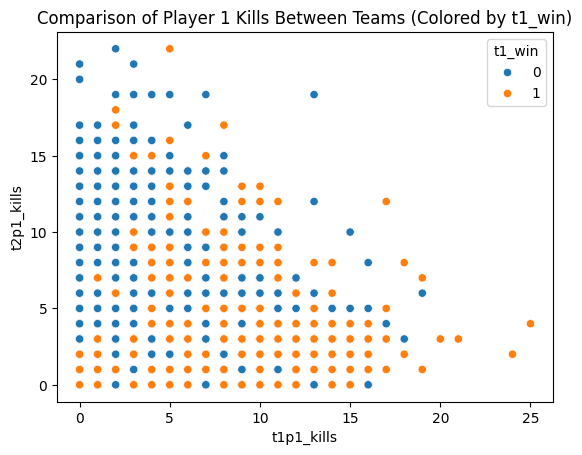

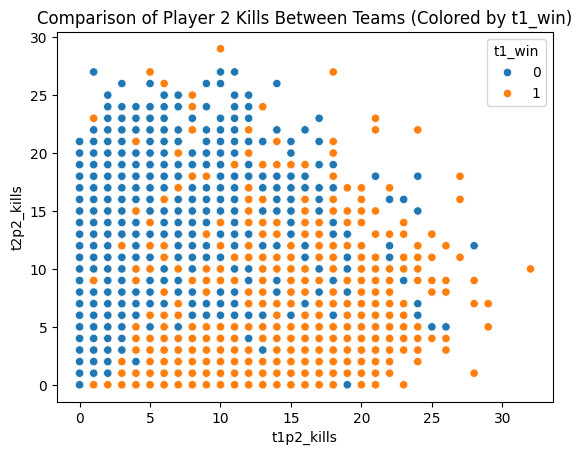

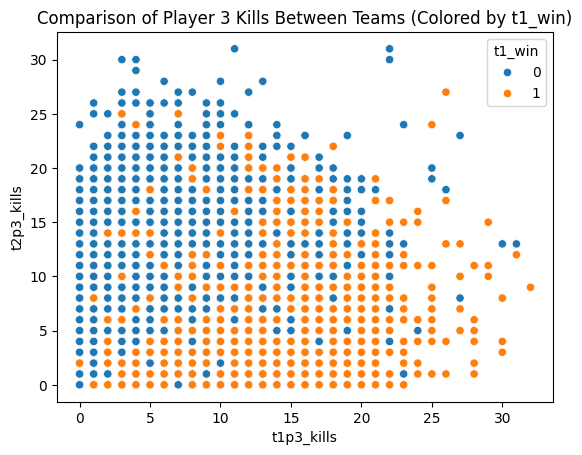

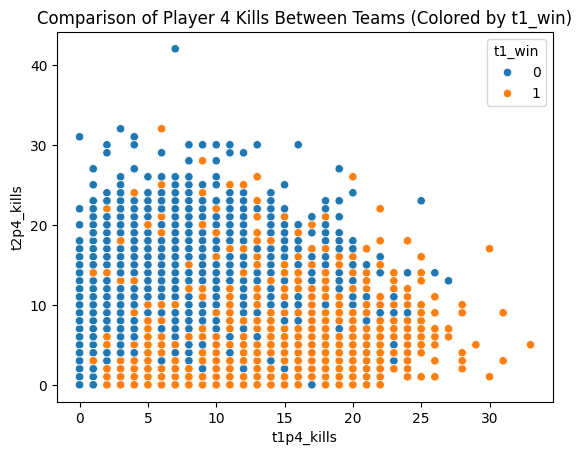

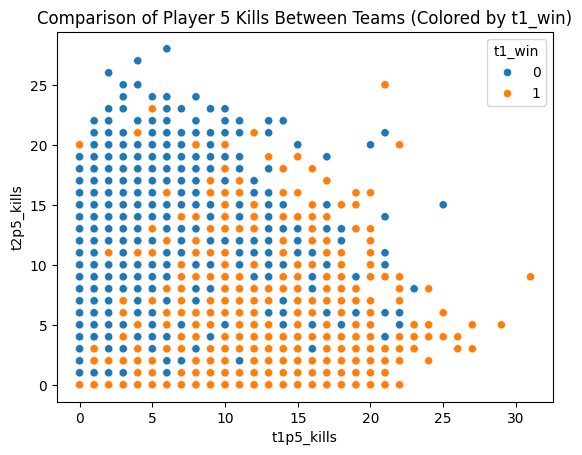

In [77]:
sns.scatterplot(x='t1p1_kills', y='t2p1_kills', data=df, hue='t1_win')
plt.title('Comparison of Player 1 Kills Between Teams (Colored by t1_win)')
plt.show()


sns.scatterplot(x='t1p2_kills', y='t2p2_kills', data=df, hue='t1_win')
plt.title('Comparison of Player 2 Kills Between Teams (Colored by t1_win)')
plt.show()

sns.scatterplot(x='t1p3_kills', y='t2p3_kills', data=df, hue='t1_win')
plt.title('Comparison of Player 3 Kills Between Teams (Colored by t1_win)')
plt.show()

sns.scatterplot(x='t1p4_kills', y='t2p4_kills', data=df, hue='t1_win')
plt.title('Comparison of Player 4 Kills Between Teams (Colored by t1_win)')
plt.show()

sns.scatterplot(x='t1p5_kills', y='t2p5_kills', data=df, hue='t1_win')
plt.title('Comparison of Player 5 Kills Between Teams (Colored by t1_win)')
plt.show()

We check death statistics. (comparision is from "player 1 on team 1" to "player 1 on team 2", this ensures the comparison is done based on the role each player is playing)

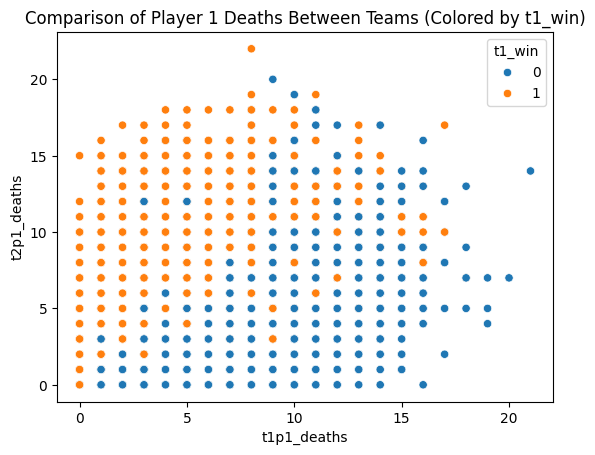

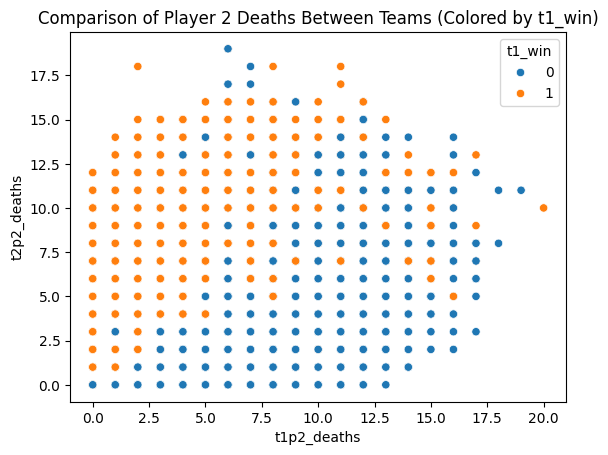

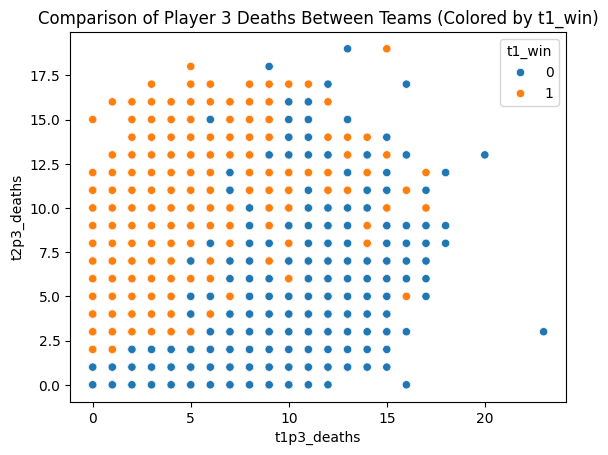

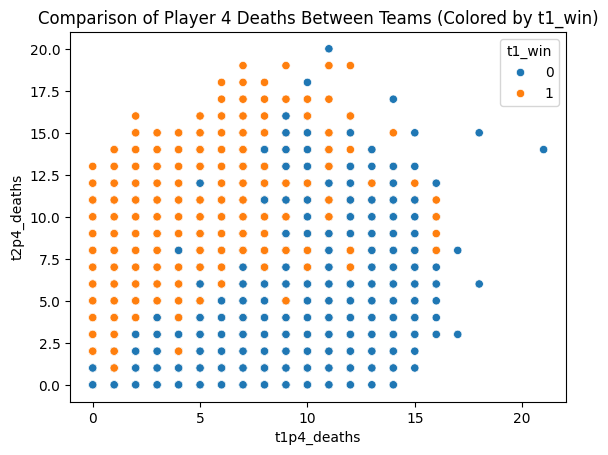

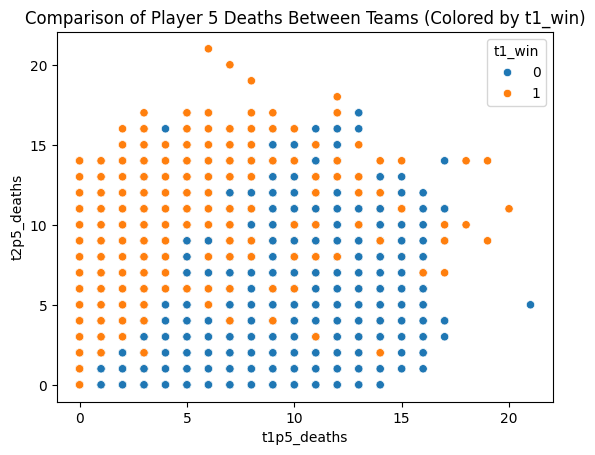

In [78]:
sns.scatterplot(x='t1p1_deaths', y='t2p1_deaths', data=df, hue='t1_win')
plt.title('Comparison of Player 1 Deaths Between Teams (Colored by t1_win)')
plt.show()


sns.scatterplot(x='t1p2_deaths', y='t2p2_deaths', data=df, hue='t1_win')
plt.title('Comparison of Player 2 Deaths Between Teams (Colored by t1_win)')
plt.show()

sns.scatterplot(x='t1p3_deaths', y='t2p3_deaths', data=df, hue='t1_win')
plt.title('Comparison of Player 3 Deaths Between Teams (Colored by t1_win)')
plt.show()

sns.scatterplot(x='t1p4_deaths', y='t2p4_deaths', data=df, hue='t1_win')
plt.title('Comparison of Player 4 Deaths Between Teams (Colored by t1_win)')
plt.show()

sns.scatterplot(x='t1p5_deaths', y='t2p5_deaths', data=df, hue='t1_win')
plt.title('Comparison of Player 5 Deaths Between Teams (Colored by t1_win)')
plt.show()

We check damage dealt to objectives. (comparision is from "player 1 on team 1" to "player 1 on team 2", this ensures the comparison is done based on the role each player is playing)

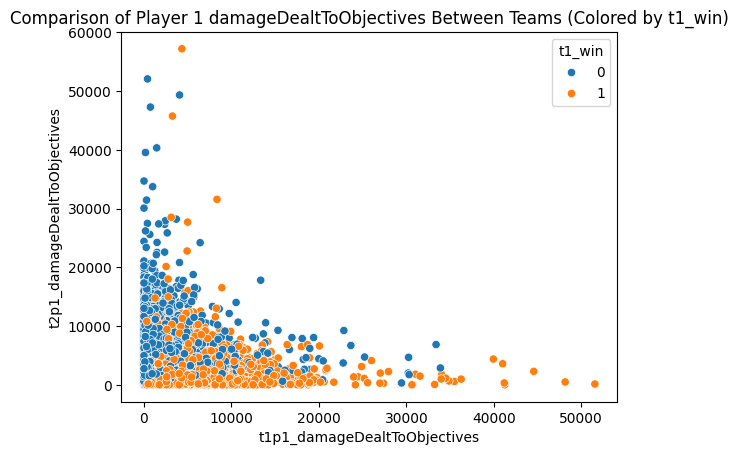

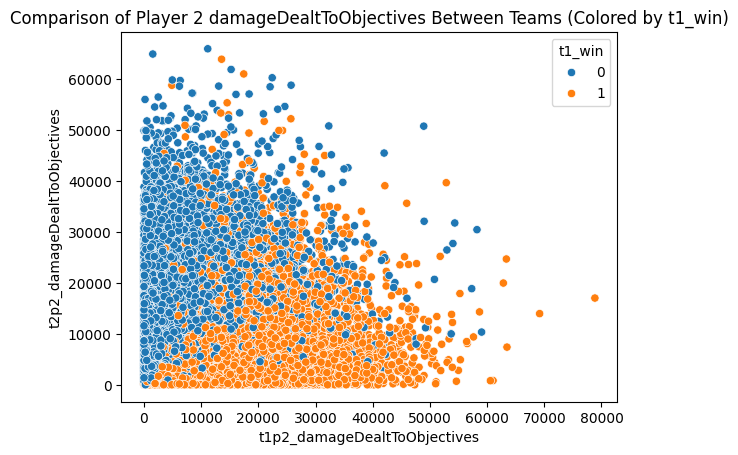

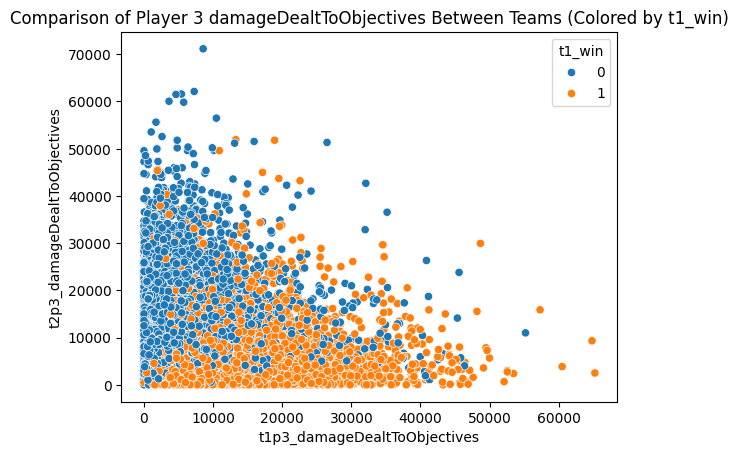

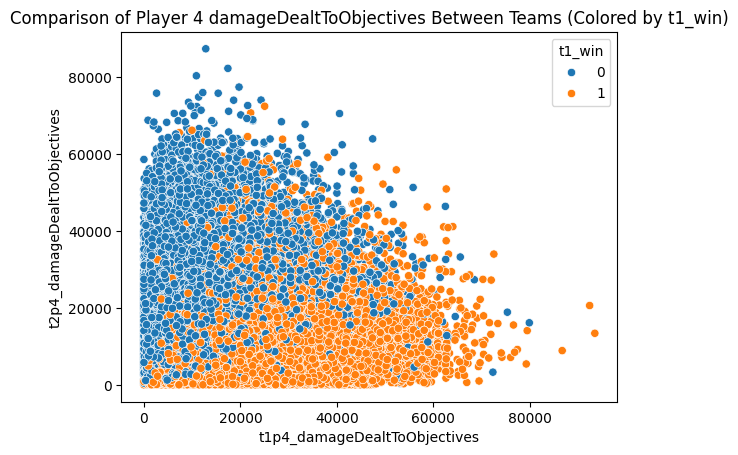

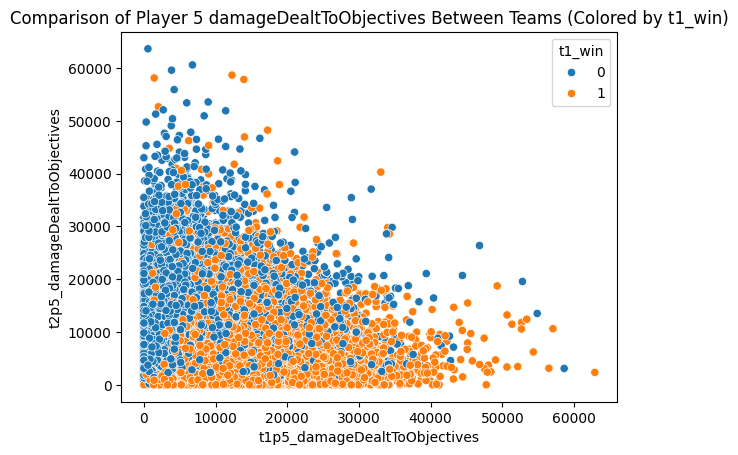

In [79]:
sns.scatterplot(x='t1p1_damageDealtToObjectives', y='t2p1_damageDealtToObjectives', data=df, hue='t1_win')
plt.title('Comparison of Player 1 damageDealtToObjectives Between Teams (Colored by t1_win)')
plt.show()


sns.scatterplot(x='t1p2_damageDealtToObjectives', y='t2p2_damageDealtToObjectives', data=df, hue='t1_win')
plt.title('Comparison of Player 2 damageDealtToObjectives Between Teams (Colored by t1_win)')
plt.show()

sns.scatterplot(x='t1p3_damageDealtToObjectives', y='t2p3_damageDealtToObjectives', data=df, hue='t1_win')
plt.title('Comparison of Player 3 damageDealtToObjectives Between Teams (Colored by t1_win)')
plt.show()

sns.scatterplot(x='t1p4_damageDealtToObjectives', y='t2p4_damageDealtToObjectives', data=df, hue='t1_win')
plt.title('Comparison of Player 4 damageDealtToObjectives Between Teams (Colored by t1_win)')
plt.show()

sns.scatterplot(x='t1p5_damageDealtToObjectives', y='t2p5_damageDealtToObjectives', data=df, hue='t1_win')
plt.title('Comparison of Player 5 damageDealtToObjectives Between Teams (Colored by t1_win)')
plt.show()

We check damage dealt to turrets. (comparision is from "player 1 on team 1" to "player 1 on team 2", this ensures the comparison is done based on the role each player is playing)

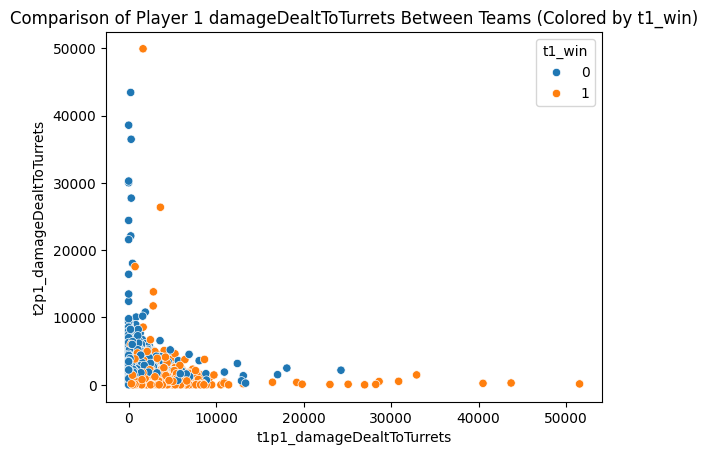

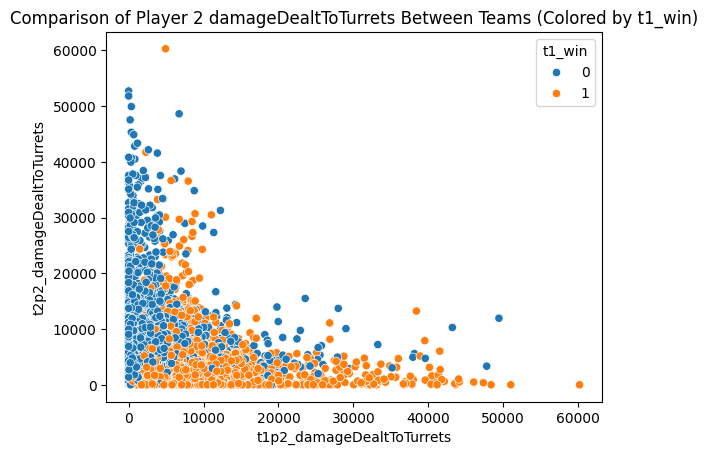

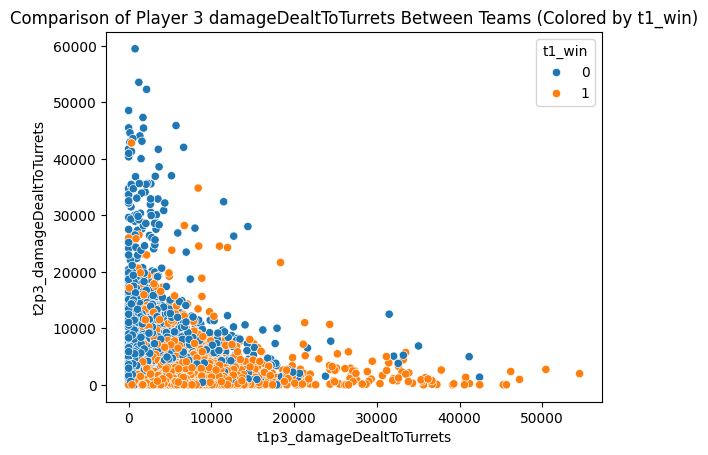

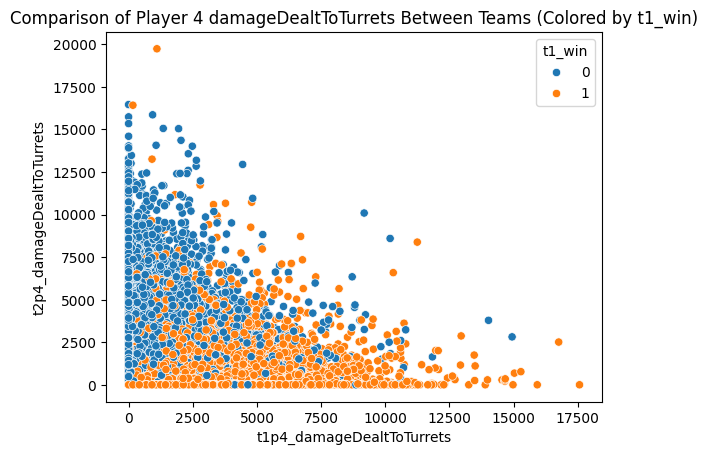

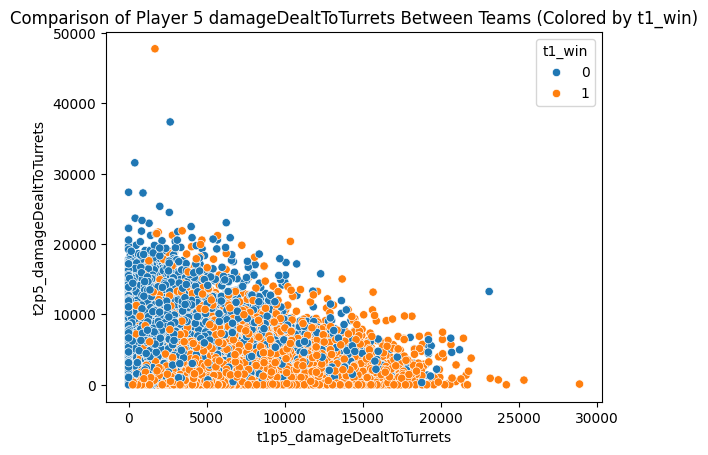

In [80]:
sns.scatterplot(x='t1p1_damageDealtToTurrets', y='t2p1_damageDealtToTurrets', data=df, hue='t1_win')
plt.title('Comparison of Player 1 damageDealtToTurrets Between Teams (Colored by t1_win)')
plt.show()


sns.scatterplot(x='t1p2_damageDealtToTurrets', y='t2p2_damageDealtToTurrets', data=df, hue='t1_win')
plt.title('Comparison of Player 2 damageDealtToTurrets Between Teams (Colored by t1_win)')
plt.show()

sns.scatterplot(x='t1p3_damageDealtToTurrets', y='t2p3_damageDealtToTurrets', data=df, hue='t1_win')
plt.title('Comparison of Player 3 damageDealtToTurrets Between Teams (Colored by t1_win)')
plt.show()

sns.scatterplot(x='t1p4_damageDealtToTurrets', y='t2p4_damageDealtToTurrets', data=df, hue='t1_win')
plt.title('Comparison of Player 4 damageDealtToTurrets Between Teams (Colored by t1_win)')
plt.show()

sns.scatterplot(x='t1p5_damageDealtToTurrets', y='t2p5_damageDealtToTurrets', data=df, hue='t1_win')
plt.title('Comparison of Player 5 damageDealtToTurrets Between Teams (Colored by t1_win)')
plt.show()

Lastly, we check to see that all games(rows) are played on the same game version, if so we will remove this column as it not meaningful.

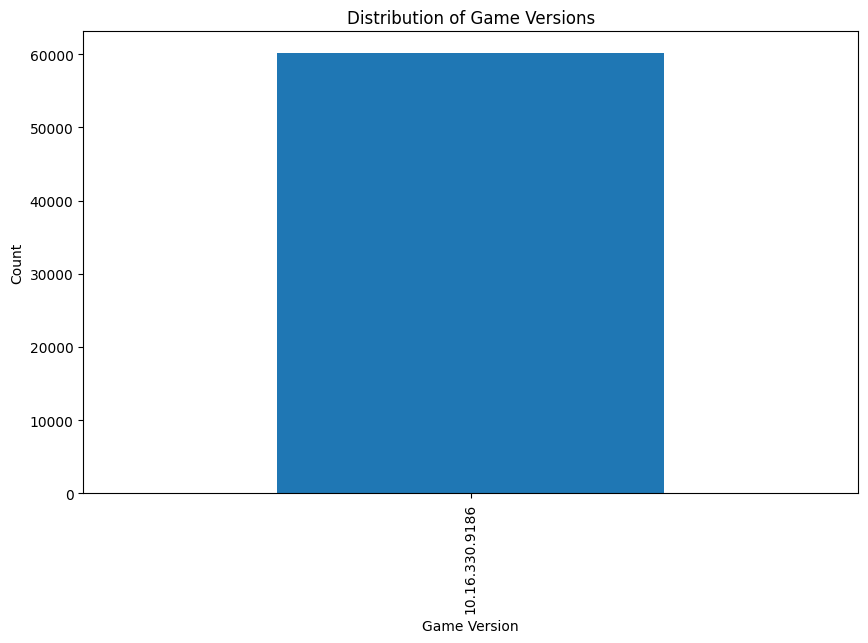

In [81]:
game_version_counts = df['gameVersion'].value_counts()

plt.figure(figsize=(10,6))
game_version_counts.plot(kind='bar')
plt.title("Distribution of Game Versions")
plt.xlabel("Game Version")
plt.ylabel("Count")
plt.show()

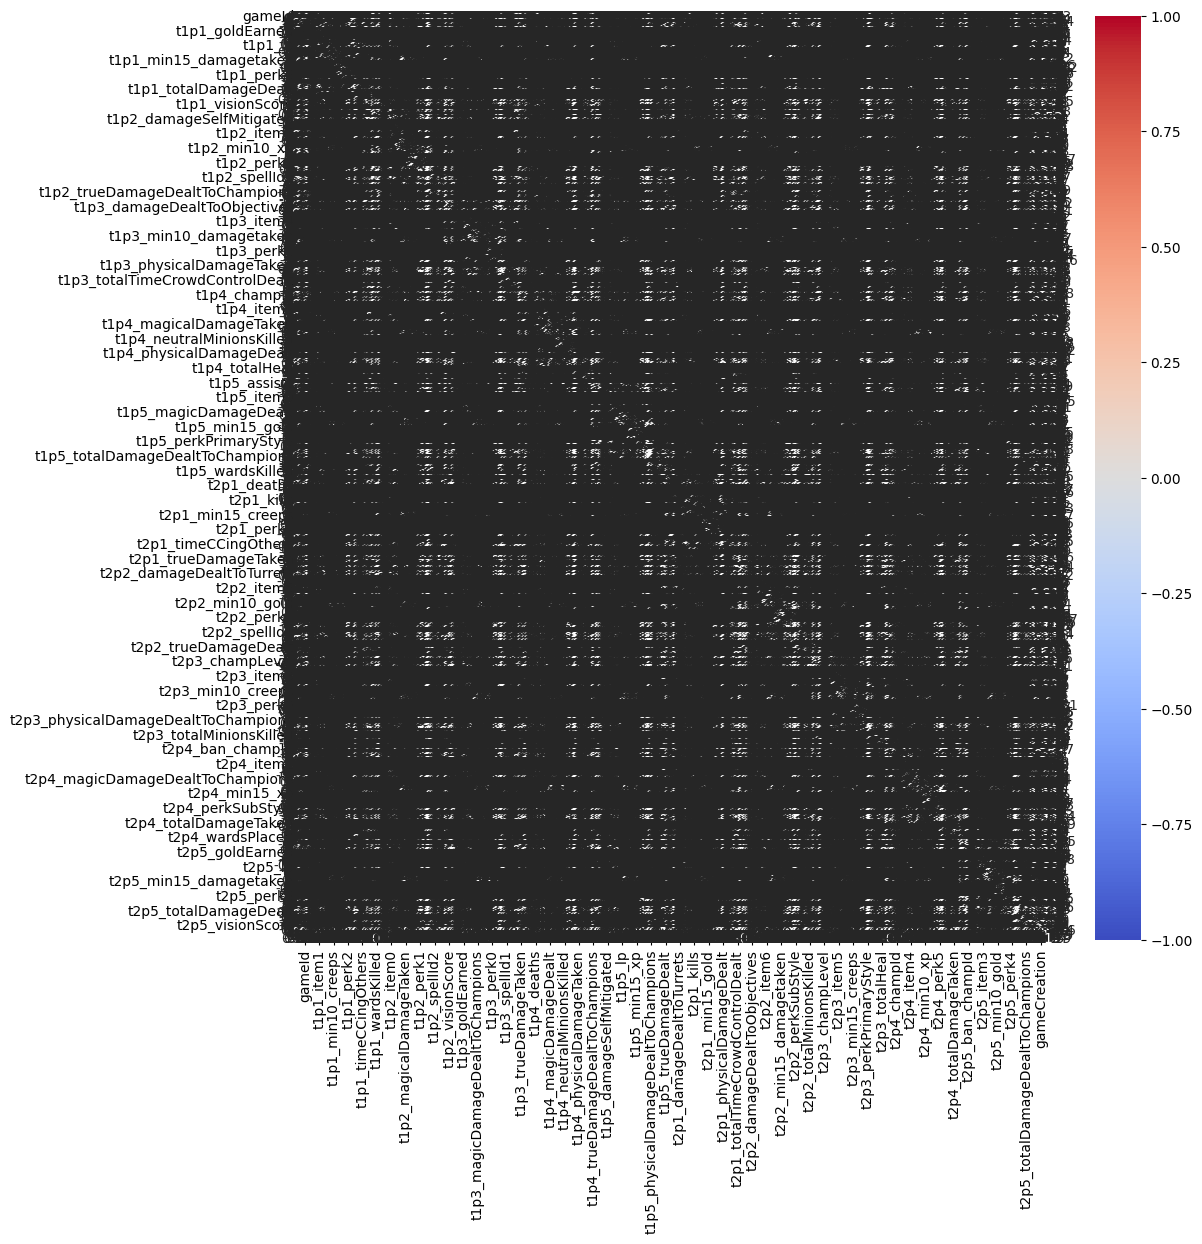

In [82]:
corr_matrix = df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1)
plt.show()

Unfortunatly, due to such high dimensionality we can't physically see anything from the heatmap of all remaining columns together.

# Data Preprocessing

We drop irrelevant features such as players name's, gameID's, etc.(these features hold no bearing on the winner or loser). We also dropped many features that are be very deterministic (leading to data leakage) and would only be available after the game is over. We would like to predict the winner while a game is still happening so we must get rid of those features, and do some Feature Engineering after.

In [83]:
df = df.drop(columns=["gameId", "t1p1_accountId", "t1p2_accountId", "t1p3_accountId", "t1p4_accountId", "t1p5_accountId", "t1p1_summonerId", "t1p2_summonerId", "t1p3_summonerId", "t1p4_summonerId", "t1p5_summonerId",
              "t1p1_summonerName","t1p2_summonerName","t1p3_summonerName","t1p4_summonerName","t1p5_summonerName", "t2p1_accountId", "t2p2_accountId", "t2p3_accountId", "t2p4_accountId", "t2p5_accountId", "t1p1_assists", 
              "t1p2_assists", "t1p3_assists", "t1p4_assists", "t1p5_assists", "t2p1_assists", "t2p2_assists", "t2p3_assists", "t2p4_assists", "t2p5_assists", "t1p1_deaths", "t1p2_deaths", "t1p3_deaths", "t1p4_deaths", "t1p5_deaths", 
              "t2p1_deaths", "t2p2_deaths", "t2p3_deaths", "t2p4_deaths", "t2p5_deaths", "t2p1_summonerId", "t2p2_summonerId", "t2p3_summonerId", "t2p4_summonerId", "t2p5_summonerId","t2p1_summonerName","t2p2_summonerName","t2p3_summonerName",
              "t2p4_summonerName","t2p5_summonerName", "t1p1_damageDealtToObjectives", "t1p2_damageDealtToObjectives", "t1p3_damageDealtToObjectives", "t1p4_damageDealtToObjectives", "t1p5_damageDealtToObjectives", "t2p1_damageDealtToObjectives", 
              "t2p2_damageDealtToObjectives", "t2p3_damageDealtToObjectives", "t2p4_damageDealtToObjectives", "t2p5_damageDealtToObjectives", "t1p1_damageDealtToTurrets", "t1p2_damageDealtToTurrets", "t1p3_damageDealtToTurrets", "t1p4_damageDealtToTurrets", 
              "t1p5_damageDealtToTurrets", "t2p1_damageDealtToTurrets", "t2p2_damageDealtToTurrets", "t2p3_damageDealtToTurrets", "t2p4_damageDealtToTurrets", "t2p5_damageDealtToTurrets", "t1p1_damageSelfMitigated", "t1p2_damageSelfMitigated", 
              "t1p3_damageSelfMitigated", "t1p4_damageSelfMitigated", "t1p5_damageSelfMitigated", "t2p1_damageSelfMitigated", "t2p2_damageSelfMitigated", "t2p3_damageSelfMitigated", "t2p4_damageSelfMitigated", "t2p5_damageSelfMitigated", 
              "t1p1_neutralMinionsKilled", "t1p2_neutralMinionsKilled", "t1p3_neutralMinionsKilled", "t1p4_neutralMinionsKilled", "t1p5_neutralMinionsKilled", "t2p1_neutralMinionsKilled", "t2p2_neutralMinionsKilled", 
              "t2p3_neutralMinionsKilled", "t2p4_neutralMinionsKilled", "t2p5_neutralMinionsKilled", "t1p1_magicDamageDealtToChampions", "t1p2_magicDamageDealtToChampions", "t1p3_magicDamageDealtToChampions", "t1p4_magicDamageDealtToChampions", 
              "t1p5_magicDamageDealtToChampions", "t2p1_magicDamageDealtToChampions", "t2p2_magicDamageDealtToChampions", "t2p3_magicDamageDealtToChampions", "t2p4_magicDamageDealtToChampions", "t2p5_magicDamageDealtToChampions", 
              "t1p1_magicDamageDealt", "t1p2_magicDamageDealt", "t1p3_magicDamageDealt", "t1p4_magicDamageDealt", "t1p5_magicDamageDealt", "t2p1_magicDamageDealt", "t2p2_magicDamageDealt", "t2p3_magicDamageDealt", "t2p4_magicDamageDealt", 
              "t2p5_magicDamageDealt", "t1p1_magicalDamageTaken", "t1p2_magicalDamageTaken", "t1p3_magicalDamageTaken", "t1p4_magicalDamageTaken", "t1p5_magicalDamageTaken", "t2p1_magicalDamageTaken", "t2p2_magicalDamageTaken", 
              "t2p3_magicalDamageTaken", "t2p4_magicalDamageTaken", "t2p5_magicalDamageTaken", "t1p1_physicalDamageDealt", "t1p2_physicalDamageDealt", "t1p3_physicalDamageDealt", "t1p4_physicalDamageDealt", "t1p5_physicalDamageDealt", 
              "t2p1_physicalDamageDealt", "t1p2_physicalDamageDealt", "t2p2_physicalDamageDealt", "t2p3_physicalDamageDealt", "t2p4_physicalDamageDealt", "t2p5_physicalDamageDealt", "t1p1_physicalDamageDealtToChampions", 
              "t1p2_physicalDamageDealtToChampions", "t1p3_physicalDamageDealtToChampions", "t1p4_physicalDamageDealtToChampions", "t1p5_physicalDamageDealtToChampions", "t2p1_physicalDamageDealtToChampions", "t2p2_physicalDamageDealtToChampions", 
              "t2p3_physicalDamageDealtToChampions", "t2p4_physicalDamageDealtToChampions", "t2p5_physicalDamageDealtToChampions", "t1p1_physicalDamageTaken", "t1p2_physicalDamageTaken", "t1p3_physicalDamageTaken", "t1p4_physicalDamageTaken",
              "t1p5_physicalDamageTaken", "t2p1_physicalDamageTaken", "t2p2_physicalDamageTaken", "t2p3_physicalDamageTaken", "t2p4_physicalDamageTaken", "t2p5_physicalDamageTaken", "t1p1_timeCCingOthers", "t1p2_timeCCingOthers", "t1p3_timeCCingOthers", 
              "t1p4_timeCCingOthers", "t1p5_timeCCingOthers", "t2p1_timeCCingOthers", "t2p2_timeCCingOthers", "t2p3_timeCCingOthers", "t2p4_timeCCingOthers", "t2p5_timeCCingOthers", "t1p1_totalDamageDealt", "t1p1_totalDamageDealt", "t1p2_totalDamageDealt",
              "t1p3_totalDamageDealt", "t1p4_totalDamageDealt", "t1p5_totalDamageDealt", "t2p1_totalDamageDealt", "t2p2_totalDamageDealt", "t2p3_totalDamageDealt", "t2p4_totalDamageDealt", "t2p5_totalDamageDealt", "t1p1_totalDamageDealtToChampions", 
              "t1p2_totalDamageDealtToChampions", "t1p3_totalDamageDealtToChampions", "t1p4_totalDamageDealtToChampions", "t1p5_totalDamageDealtToChampions", "t2p1_totalDamageDealtToChampions", "t2p2_totalDamageDealtToChampions", "t2p3_totalDamageDealtToChampions", 
              "t2p4_totalDamageDealtToChampions", "t2p5_totalDamageDealtToChampions", "t1p1_totalDamageTaken", "t1p2_totalDamageTaken", "t1p3_totalDamageTaken", "t1p4_totalDamageTaken", "t1p5_totalDamageTaken", "t2p1_totalDamageTaken", "t2p2_totalDamageTaken", 
              "t2p3_totalDamageTaken", "t2p4_totalDamageTaken", "t2p5_totalDamageTaken", "t1p1_totalHeal", "t1p2_totalHeal", "t1p3_totalHeal", "t1p4_totalHeal", "t1p5_totalHeal", "t2p1_totalHeal", "t2p2_totalHeal", "t2p3_totalHeal", "t2p4_totalHeal", 
              "t2p5_totalHeal", "t1p1_totalMinionsKilled", "t1p2_totalMinionsKilled", "t1p3_totalMinionsKilled", "t1p4_totalMinionsKilled", "t1p5_totalMinionsKilled", "t2p1_totalMinionsKilled", "t2p2_totalMinionsKilled", "t2p3_totalMinionsKilled", 
              "t2p4_totalMinionsKilled", "t2p5_totalMinionsKilled", "t1p1_totalTimeCrowdControlDealt", "t1p2_totalTimeCrowdControlDealt", "t1p3_totalTimeCrowdControlDealt", "t1p4_totalTimeCrowdControlDealt", "t1p5_totalTimeCrowdControlDealt", 
              "t2p1_totalTimeCrowdControlDealt", "t2p2_totalTimeCrowdControlDealt", "t2p3_totalTimeCrowdControlDealt", "t2p4_totalTimeCrowdControlDealt", "t2p5_totalTimeCrowdControlDealt", "t1p1_trueDamageDealt", "t1p2_trueDamageDealt", 
              "t1p3_trueDamageDealt", "t1p4_trueDamageDealt", "t1p5_trueDamageDealt", "t2p1_trueDamageDealt", "t2p2_trueDamageDealt", "t2p3_trueDamageDealt", "t2p4_trueDamageDealt", "t2p5_trueDamageDealt", "t1p1_trueDamageDealtToChampions", 
              "t1p2_trueDamageDealtToChampions", "t1p3_trueDamageDealtToChampions", "t1p4_trueDamageDealtToChampions", "t1p5_trueDamageDealtToChampions", "t2p1_trueDamageDealtToChampions", "t2p2_trueDamageDealtToChampions", "t2p3_trueDamageDealtToChampions", 
              "t2p4_trueDamageDealtToChampions", "t2p5_trueDamageDealtToChampions", "t1p1_trueDamageTaken", "t1p2_trueDamageTaken", "t1p3_trueDamageTaken", "t1p4_trueDamageTaken", "t1p5_trueDamageTaken", "t2p1_trueDamageTaken", "t2p2_trueDamageTaken", 
              "t2p3_trueDamageTaken", "t2p4_trueDamageTaken", "t2p5_trueDamageTaken", "t1p1_wardsKilled", "t1p2_wardsKilled", "t1p3_wardsKilled", "t1p4_wardsKilled", "t1p5_wardsKilled", "t2p1_wardsKilled", "t2p2_wardsKilled", "t2p3_wardsKilled", 
              "t2p4_wardsKilled", "t2p5_wardsKilled", "t1p1_wardsPlaced", "t1p2_wardsKilled", "t1p3_wardsKilled", "t1p4_wardsKilled", "t1p5_wardsKilled", "t2p1_wardsKilled", "t2p2_wardsKilled", "t2p3_wardsKilled", "t2p4_wardsKilled", "t2p5_wardsKilled", 
              "t1p1_wardsPlaced", "t1p2_wardsPlaced", "t1p3_wardsPlaced", "t1p4_wardsPlaced", "t1p5_wardsPlaced", "t2p1_wardsPlaced", "t2p2_wardsPlaced", "t2p3_wardsPlaced", "t2p4_wardsPlaced", "t2p5_wardsPlaced", "t1p1_goldEarned", "t1p2_goldEarned", 
              "t1p3_goldEarned", "t1p4_goldEarned", "t1p5_goldEarned", "t2p1_goldEarned", "t2p2_goldEarned", "t2p3_goldEarned", "t2p4_goldEarned", "t2p5_goldEarned", "t1p1_kills", "t1p2_kills", "t1p3_kills", "t1p4_kills", "t1p5_kills", "t2p1_kills", 
              "t2p2_kills", "t2p3_kills", "t2p4_kills", "t2p5_kills", "t1p1_deaths", "t1p2_deaths", "t1p3_deaths", "t1p4_deaths", "t1p5_deaths", "t2p1_deaths", "t2p2_deaths", "t2p3_deaths", "t2p4_deaths", "t2p5_deaths", "gameVersion",
              "platformId", "gameCreation", "queueId", "gameDuration"])
df.head()

t1p1_ban_champId  t1p1_champId  t1p1_champLevel  t1p1_item0  t1p1_item1  \
0               121            25               11        3158        3157   
1               111            37               13        1001        3174   
2               122            89               11        3193        3857   
3                81            89               11        3860        3050   
4                91            25               11           0        3028   

   t1p1_item2  t1p1_item3  t1p1_item4  t1p1_item5  t1p1_item6  ...  \
0        3860        3114        2055        1028        3364  ...   
1        3504        3853        3114        1082        3364  ...   
2        3105        3009        2055        1033        3364  ...   
3        3109        2055        3047           0        3364  ...   
4        3860        2065        3158        3108        3364  ...   

   t2p5_perk5  t2p5_perkPrimaryStyle  t2p5_perkSubStyle  t2p5_role  \
0        8316                   8200             8300.0        TOP   
1        8234                   8000             8200.0        TOP   
2        8451                   8000             8400.0        TOP   
3        8473                   8000             8400.0        TOP   
4        8345                   8000             8300.0        TOP   

   t2p5_spellId1  t2p5_spellId2  t2p5_visionScore  average_lp  t1_teamId  \
0              4             12                13      3380.4        100   
1              4              6                11      3284.9        100   
2             12              4                27      3333.2        100   
3              4              6                 7      3258.1        100   
4              4             12                14      3116.0        100   

   t1_win  
0       0  
1       1  
2       0  
3       1  
4       0  

[5 rows x 313 columns]

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60107 entries, 0 to 60155
Columns: 313 entries, t1p1_ban_champId to t1_win
dtypes: float64(96), int64(207), object(10)
memory usage: 144.0+ MB


Feature engieering on team level statistics

In [85]:
for stat in ['creeps', 'damagetaken', 'gold', 'xp']:
    #Compute team totals for 10 min and 15 min
    df[f't1_{stat}_10'] = df[[f't1p{i}_min10_{stat}' for i in range(1,6)]].sum(axis=1)
    df[f't2_{stat}_10'] = df[[f't2p{i}_min10_{stat}' for i in range(1,6)]].sum(axis=1)
    df[f't1_{stat}_15'] = df[[f't1p{i}_min15_{stat}' for i in range(1,6)]].sum(axis=1)
    df[f't2_{stat}_15'] = df[[f't2p{i}_min15_{stat}' for i in range(1,6)]].sum(axis=1)
    #Compute the gains of a team (momentum)
    df[f't1_{stat}_gain'] = df[f't1_{stat}_15'] - df[f't1_{stat}_10']
    df[f't2_{stat}_gain'] = df[f't2_{stat}_15'] - df[f't2_{stat}_10']
    df[f'{stat}_gain_diff'] = df[f't1_{stat}_gain'] - df[f't2_{stat}_gain']
    #Compute difference between teams at 10 min and 15 min
    df[f'{stat}_diff_10'] = df[f't1_{stat}_10'] - df[f't2_{stat}_10']
    df[f'{stat}_diff_15'] = df[f't1_{stat}_15'] - df[f't2_{stat}_15']
    #Normalize the gains over 5 min window
    df[f't1_{stat}_gain_per_min'] = df[f't1_{stat}_gain'] / 5
    df[f't2_{stat}_gain_per_min'] = df[f't2_{stat}_gain'] / 5
    #Compute total gains difference per minute
    df[f'{stat}_gain_diff_per_min'] = df[f't1_{stat}_gain_per_min'] - df[f't2_{stat}_gain_per_min']

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60107 entries, 0 to 60155
Columns: 361 entries, t1p1_ban_champId to xp_gain_diff_per_min
dtypes: float64(144), int64(207), object(10)
memory usage: 166.0+ MB


We create dummy variables for the roles players are playing. Currently a string value, we change to a boolean. Why did we keep roles column though? Because the "stats" of each player are tied to their role, which will be helpful for the model.

In [87]:
df_dummies = pd.get_dummies(df, columns=['t1p1_role', 't1p2_role', 't1p3_role', 't1p4_role', 't1p5_role','t2p1_role', 't2p2_role', 't2p3_role', 't2p4_role', 't2p5_role'], drop_first=False)
print(df_dummies)

       t1p1_ban_champId  t1p1_champId  t1p1_champLevel  t1p1_item0  \
0                   121            25               11        3158   
1                   111            37               13        1001   
2                   122            89               11        3193   
3                    81            89               11        3860   
4                    91            25               11           0   
...                 ...           ...              ...         ...   
60151               111           350                7        3850   
60152               104           235                8        1001   
60153               238            80               15        3190   
60154               141           432                9        3859   
60155                -1           432                8        2055   

       t1p1_item1  t1p1_item2  t1p1_item3  t1p1_item4  t1p1_item5  t1p1_item6  \
0            3157        3860        3114        2055        1028        3364 

In [88]:
y = df_dummies["t1_win"]
x = df_dummies.drop("t1_win", axis = 1)
x

t1p1_ban_champId  t1p1_champId  t1p1_champLevel  t1p1_item0  \
0                   121            25               11        3158   
1                   111            37               13        1001   
2                   122            89               11        3193   
3                    81            89               11        3860   
4                    91            25               11           0   
...                 ...           ...              ...         ...   
60151               111           350                7        3850   
60152               104           235                8        1001   
60153               238            80               15        3190   
60154               141           432                9        3859   
60155                -1           432                8        2055   

       t1p1_item1  t1p1_item2  t1p1_item3  t1p1_item4  t1p1_item5  t1p1_item6  \
0            3157        3860        3114        2055        1028        3364   
1            3174        3504        3853        3114        1082        3364   
2            3857        3105        3009        2055        1033        3364   
3            3050        3109        2055        3047           0        3364   
4            3028        3860        2065        3158        3108        3364   
...           ...         ...         ...         ...         ...         ...   
60151        3028        3108           0        1004           0        3340   
60152        2031        3863        1011        1028        1036        3340   
60153        3009        3179        3857        3071        2055        3364   
60154        1011        1029        3117        1004        2055        3364   
60155        3028        3117        3108        1028        3858        3364   

       ...  t1p1_role_SUPPORT  t1p2_role_ADC  t1p3_role_MIDDLE  \
0      ...               True           True              True   
1      ...               True           True              True   
2      ...               True           True              True   
3      ...               True           True              True   
4      ...               True           True              True   
...    ...                ...            ...               ...   
60151  ...               True           True              True   
60152  ...               True           True              True   
60153  ...               True           True              True   
60154  ...               True           True              True   
60155  ...               True           True              True   

       t1p4_role_JUNGLE  t1p5_role_TOP  t2p1_role_SUPPORT  t2p2_role_ADC  \
0                  True           True               True           True   
1                  True           True               True           True   
2                  True           True               True           True   
3                  True           True               True           True   
4                  True           True               True           True   
...                 ...            ...                ...            ...   
60151              True           True               True           True   
60152              True           True               True           True   
60153              True           True               True           True   
60154              True           True               True           True   
60155              True           True               True           True   

       t2p3_role_MIDDLE  t2p4_role_JUNGLE  t2p5_role_TOP  
0                  True              True           True  
1                  True              True           True  
2                  True              True           True  
3                  True              True           True  
4                  True              True           True  
...                 ...               ...            ...  
60151              True              True           True  
60152          

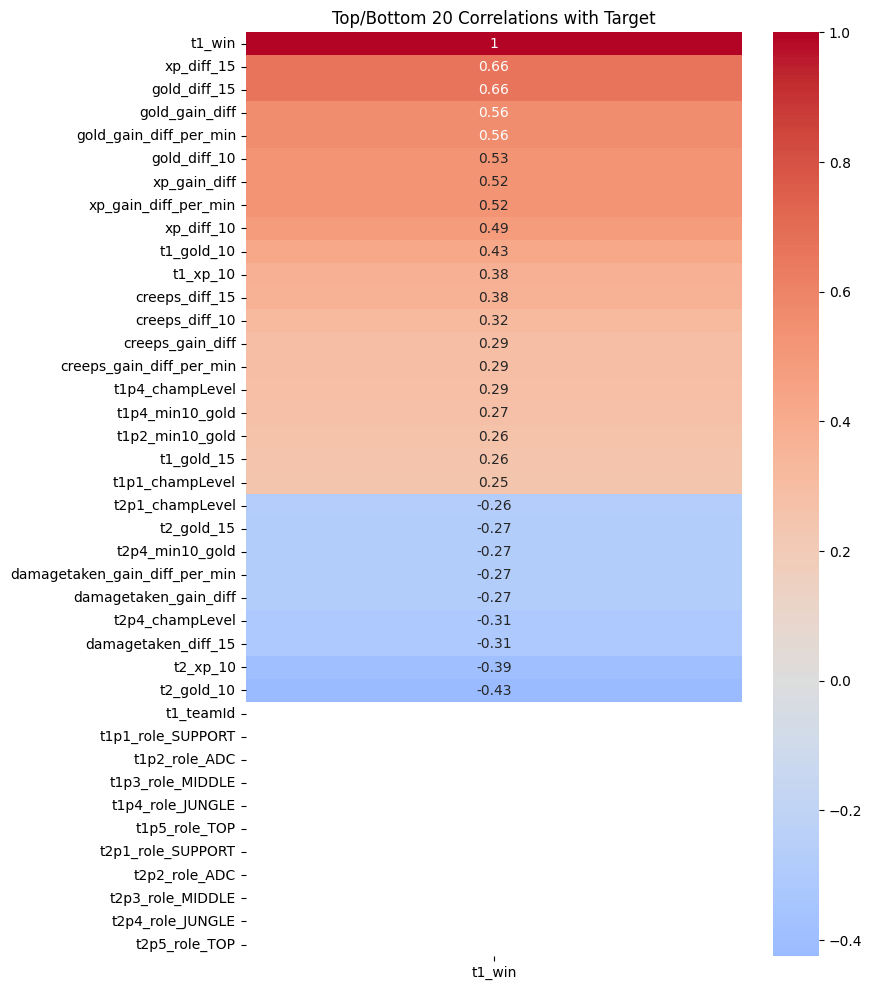

In [89]:
# Calculate correlations with target
corr_with_target = df_dummies.corr()[['t1_win']].sort_values('t1_win', ascending=False)

# Top 20 and Bottom 20 features
top_20 = corr_with_target.head(20)
bottom_20 = corr_with_target.tail(20)
extreme_corr = pd.concat([top_20, bottom_20])

# Plot
plt.figure(figsize=(8, 12))
sns.heatmap(extreme_corr, annot=True, cmap='coolwarm', center=0)
plt.title("Top/Bottom 20 Correlations with Target")
plt.show()

Split the data into test/train sets

In [90]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

We scale AFTER splitting the test/train as we dont want to model to "peak" at the data early(Info on Data leakage from https://scikit-learn.org/stable/common_pitfalls.html). Scaling is still applied to both the test and train sets.

In [91]:
#scale the features
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

# Logistic Regression

Creation of the logistic Regression model

In [92]:
lr_model = LogisticRegression(penalty=None)

We fit the model.

In [93]:
lr_model.fit(X_train_scaled, y_train)

LogisticRegression(penalty=None)

In [94]:
print("Coefficients:", lr_model.coef_)
print("Intercept:", lr_model.intercept_)

Coefficients: [[ 5.32047019e-02 -9.91487752e-02  3.30646862e+00 -1.44671371e-01
  -9.37654680e-02 -1.63359863e-01 -1.40351644e-01 -7.12023064e-02
  -1.99081355e-02  4.36669322e-02  5.00180135e-01 -1.39409626e-01
   3.81129443e-02  2.77948341e-01  7.01642875e-02  1.84319315e-01
  -8.52142082e-02 -3.04888524e-01 -3.14247671e-01 -5.10396986e-02
  -6.09877282e-02 -2.19865947e-02  8.13457344e-02  4.85292686e-02
   3.37198646e-02  7.84147401e-02 -4.68384375e-02  4.10416183e-02
  -1.52606797e-02  8.98802462e-02 -3.74512864e-02  6.55982275e-02
   2.89524689e+00 -1.40599036e-01 -2.97736032e-02 -4.24621918e-02
  -2.79461402e-04  1.90765932e-02 -9.57178982e-03  6.61578678e-02
   2.90525982e-01  2.31807683e-02  5.16380729e-02 -1.45730452e-01
   5.98655046e-02 -1.86572903e-02  4.16936703e-02  4.20162128e-01
  -2.18198727e-01 -1.10478011e-02  7.35324273e-02 -7.72267863e-02
  -1.38579976e-02 -1.25939089e-01 -9.46321027e-02  1.28006927e-01
   1.26114714e-01  1.77537086e-02 -9.29262448e-03  2.37607794e

We make predictions on the test set.

In [95]:
y_pred = lr_model.predict(X_test_scaled)
#y_prob = lr_model.predict_proba(X_test)

# Random Forrest

In [96]:
# Initialize Random Forest Model
rf_model = RandomForestClassifier(n_estimators=200, max_depth=15, min_samples_split=5, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Model Evaluation

### Logistic Regression Eval.

We check the classification report for the Logistic Regression model.

In [97]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, digits=4)

print(f"Test Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)


Test Accuracy: 0.9820
Classification Report:
               precision    recall  f1-score   support

           0     0.9824    0.9821    0.9822      6077
           1     0.9817    0.9820    0.9818      5945

    accuracy                         0.9820     12022
   macro avg     0.9820    0.9820    0.9820     12022
weighted avg     0.9820    0.9820    0.9820     12022



Cross-Validtion check of the Logistic Regression model (Using pipeline to ensure correct scaling)

In [98]:
#pipeline to ensure the scaling of each fold happens appropriatly
lr_model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

#cross-validation (10 folds)
cv_scores = cross_val_score(lr_model, x, y, cv=10, scoring='f1')

print("Cross-validation f1 scores for each fold:", cv_scores)
print("Mean cross-validation f1:", np.mean(cv_scores))

Cross-validation f1 scores for each fold: [0.97798378 0.9781746  0.97870233 0.98044415 0.97887091 0.98153034
 0.9829442  0.98207766 0.98285526 0.98115079]
Mean cross-validation f1: 0.9804734027886562


Dummy Classifer to show the model is learning and not just guessing (like guessing the majority class)

In [99]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
print(f"Dummy F1: {f1_score(y_test, dummy.predict(X_test))}")

Dummy F1: 0.6617687983525352


Checks for class imbalance after splitting data into train/test sets.

In [100]:
# Check the distribution of classes in the training set
print("Class distribution in training data:")
print(y_train.value_counts())

# Check the distribution of classes in the test set
print("Class distribution in test data:")
print(y_test.value_counts())

Class distribution in training data:
t1_win
1    24304
0    23781
Name: count, dtype: int64
Class distribution in test data:
t1_win
0    6077
1    5945
Name: count, dtype: int64


We check the Confusion matrix of the Logistic Regression model

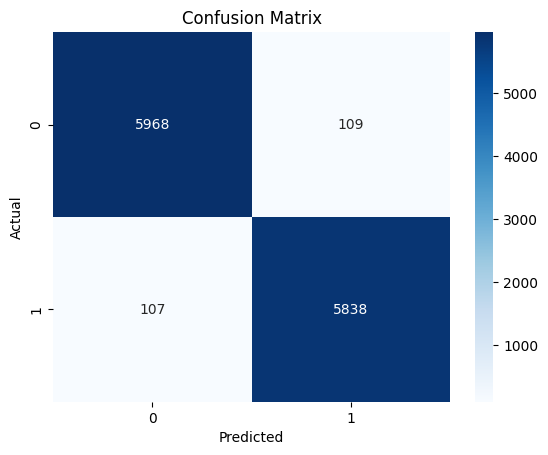

In [101]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Random Forrest Eval.

We check the classification report for the Random Forrest model.

In [102]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Show full classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Accuracy: 0.9360
Precision: 0.9379
Recall: 0.9324
F1 Score: 0.9351

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94      6077
           1       0.94      0.93      0.94      5945

    accuracy                           0.94     12022
   macro avg       0.94      0.94      0.94     12022
weighted avg       0.94      0.94      0.94     12022



We check the Confusion Matrix for the Random Forrest model.

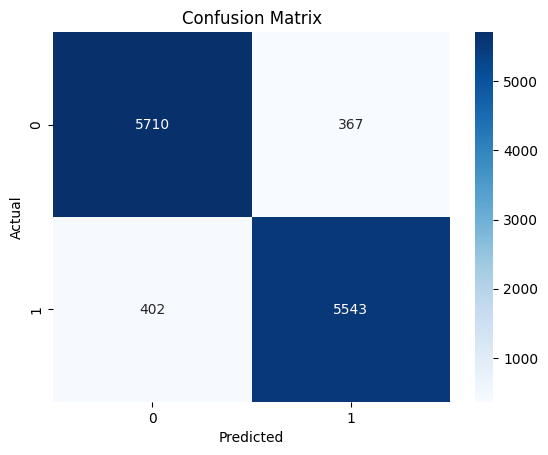

In [103]:
# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Feature importance for the Random Forrest model

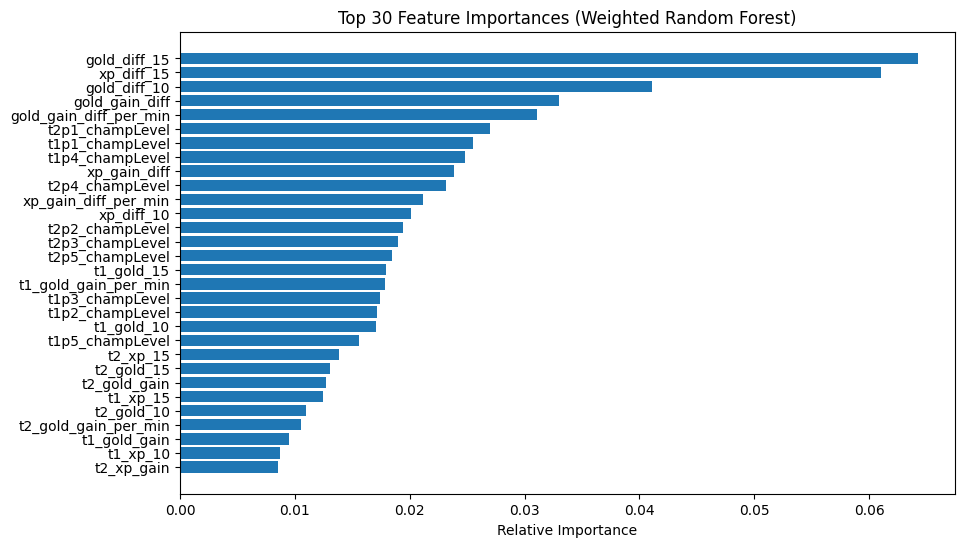

In [104]:
importances = rf_model.feature_importances_  # For the non-weighted model

# Get indices of top 30 most important features
indices = np.argsort(importances)[::-1][:30]  # Sort and take top 30 features

# Plot the top 30 features
plt.figure(figsize=(10, 6))
plt.title("Top 30 Feature Importances (Weighted Random Forest)")
plt.barh(range(30), importances[indices], align="center")
plt.yticks(range(30), X_train.columns[indices])  # Using the column names for the top 30
plt.xlabel("Relative Importance")
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()

# Model Tuning

**Logistic Regression** tuning using class_weight to balance weight on predictions.

In [105]:
lr_model = LogisticRegression(class_weight='balanced')

lr_model.fit(X_train_scaled, y_train)

y_pred = lr_model.predict(X_test_scaled)

**Random Forrest** tuning via GridSearchCV

In [106]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10, 15]
}
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 15, 20],
                         'min_samples_split': [2, 5, 10, 15],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [107]:
# Initialize Random Forest Model
rf_model = grid_search.best_estimator_

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Results after tuning

**Logistic Regression** results after tuning

In [108]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, digits=4)

print(f"Test Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)

Test Accuracy: 0.9822
Classification Report:
               precision    recall  f1-score   support

           0     0.9822    0.9826    0.9824      6077
           1     0.9822    0.9818    0.9820      5945

    accuracy                         0.9822     12022
   macro avg     0.9822    0.9822    0.9822     12022
weighted avg     0.9822    0.9822    0.9822     12022



In [109]:
#pipeline to ensure the scaling of each fold happens appropriatly
lr_model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

#cross-validation (10 folds)
cv_scores = cross_val_score(lr_model, x, y, cv=10, scoring='f1')

print("Cross-validation f1 scores for each fold:", cv_scores)
print("Mean cross-validation f1-score:", np.mean(cv_scores))

Cross-validation f1 scores for each fold: [0.97798378 0.9781746  0.97870233 0.98044415 0.97887091 0.98153034
 0.9829442  0.98207766 0.98285526 0.98115079]
Mean cross-validation f1-score: 0.9804734027886562


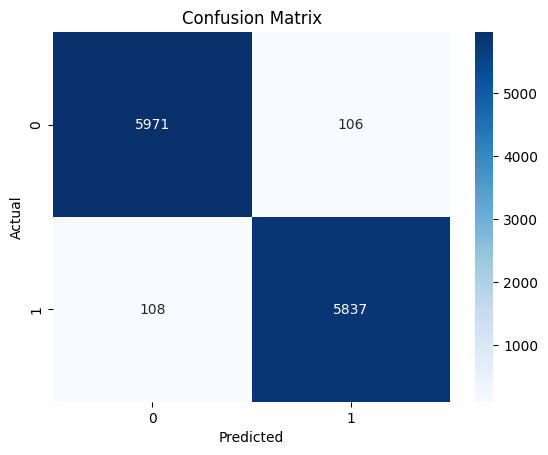

In [110]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Overall, Logistic regression saw a very very small increase. 

-------------------------------------------

**Random Forrest** results after tuning

We check the classification report for the Random Forrest model.

In [111]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Show full classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Accuracy: 0.9386
Precision: 0.9394
Recall: 0.9362
F1 Score: 0.9378

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      6077
           1       0.94      0.94      0.94      5945

    accuracy                           0.94     12022
   macro avg       0.94      0.94      0.94     12022
weighted avg       0.94      0.94      0.94     12022



We check the Confusion Matrix for the Random Forrest model.

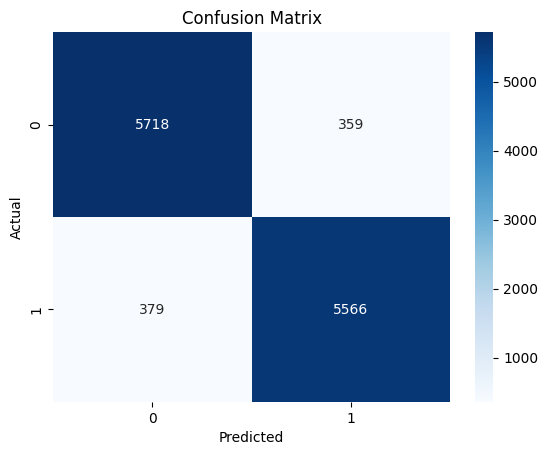

In [112]:
# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Visualizing the results from a GridSearchCV over a 3-parameter grid for Random Forest Classifier

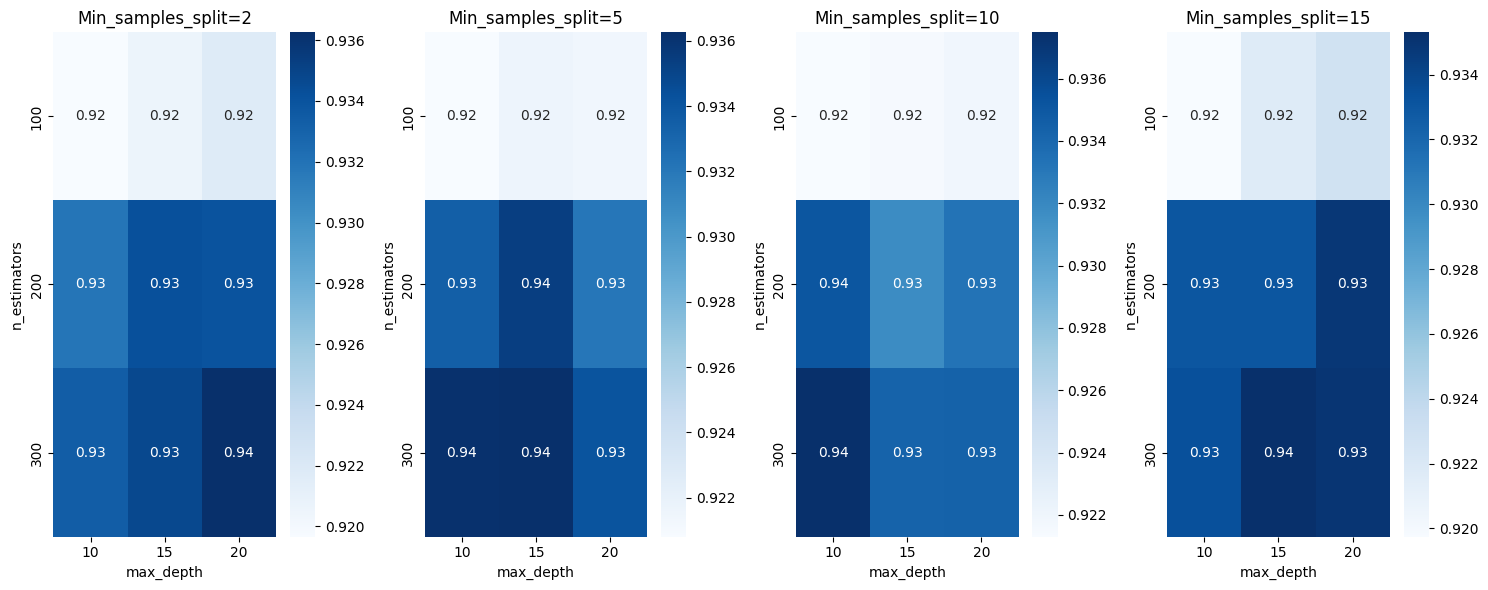

In [113]:
# Get the results from GridSearchCV
results = grid_search.cv_results_

# Extract the mean test scores and reshape them into a 3D array
mean_test_scores = results['mean_test_score']

# Reshape mean_test_scores into a 3D matrix
scores_matrix_3d = mean_test_scores.reshape(
    len(param_grid['n_estimators']), 
    len(param_grid['max_depth']), 
    len(param_grid['min_samples_split'])
)

# Create subplots for each value of 'min_samples_split'
fig, axes = plt.subplots(1, len(param_grid['min_samples_split']), figsize=(15, 6))

for idx, min_samples_split_value in enumerate(param_grid['min_samples_split']):
    z = scores_matrix_3d[:, :, idx]  # Slice for the current 'min_samples_split' value
    sns.heatmap(z, annot=True, cmap='Blues', xticklabels=param_grid['max_depth'], 
                yticklabels=param_grid['n_estimators'], ax=axes[idx])
    axes[idx].set_title(f'Min_samples_split={min_samples_split_value}')
    axes[idx].set_xlabel('max_depth')
    axes[idx].set_ylabel('n_estimators')

plt.tight_layout()
plt.show()

Feature importance for the Random Forrest model

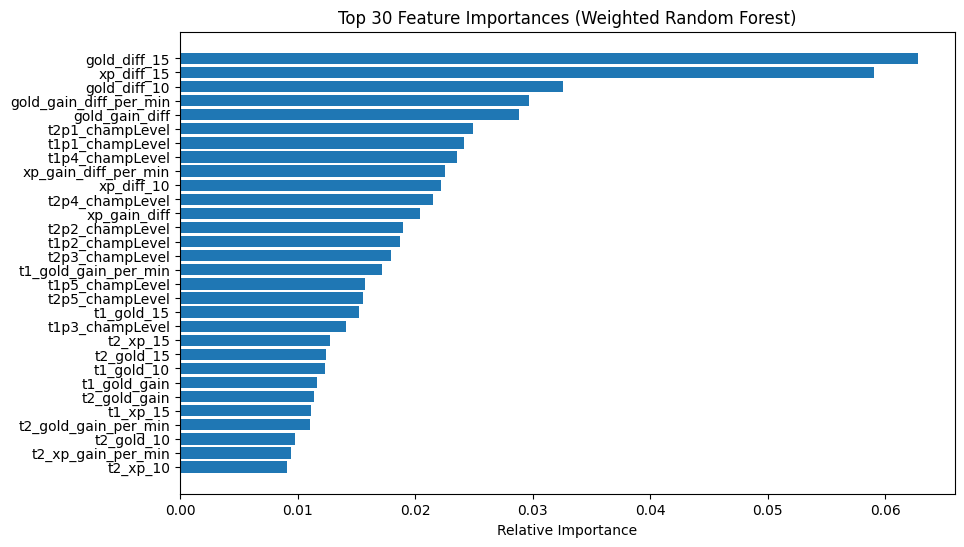

In [114]:
importances = rf_model.feature_importances_  # For the non-weighted model

# Get indices of top 30 most important features
indices = np.argsort(importances)[::-1][:30]  # Sort and take top 30 features

# Plot the top 30 features
plt.figure(figsize=(10, 6))
plt.title("Top 30 Feature Importances (Weighted Random Forest)")
plt.barh(range(30), importances[indices], align="center")
plt.yticks(range(30), X_train.columns[indices])  # Using the column names for the top 30
plt.xlabel("Relative Importance")
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()

# **Analysis of Results**

Logistic Regression worked best at .98 F1 and saw little inprovement from our tuning of the class_weight. Logistic Regression also balanced both precision and recall very well, showing that the model is effective at making its prediction. Random Forrest also performed well at .94 F1 after tuning using GridSearchCV. Random Forrest also helped us to find the most impactful features which was gold_diff_15 and xp_diff_15. We also found that our Feature Selection and Engineering was well done. We were able to allow the model to better generalize and prevent overfitting with our EDA and Data Pre-processing. Overall our approach to the data, task, and models were appropriate and effective.

# **Conclusion**

In conclusion, Logistic Regression was a great pick for the task. The task we chose("To predict whether Team 1 will win a game or not") in general lined up very well with our dataset as well. We also learned alot about model and data validation along the way. 

# **Next Steps / Recommendation**

Our recommened next steps would be to attempt to reduce the features even more to allow the model to be deployed. We still have approximately 300 features so reducing that even more could help the model to run more efficiently when in production. Ofcourse, it works very well now so it could also go into production as is. If the model did have more features dropped it would need to be retested to ensure reliablity and accuracy are maintained before release. We could also collect more data using the Riot Gaming api, to allow the model to train on much more data. The api does require approval from Riot Gaming to use, so that would also be a hurdle to overcome.

# **Extra:** Validation Logistic Regression is correctly built using a "known dataset".

In [124]:
columns = ["age", "sex","chestpain","bp","cholestorel","sugar","ecg","heartrate","angina","oldpeak","slope","vessels","thal","presence"]
df = pd.read_csv("../data/heart.dat",names=columns, sep=' ')

df.head()

age  sex  chestpain     bp  cholestorel  sugar  ecg  heartrate  angina  \
0  70.0  1.0        4.0  130.0        322.0    0.0  2.0      109.0     0.0   
1  67.0  0.0        3.0  115.0        564.0    0.0  2.0      160.0     0.0   
2  57.0  1.0        2.0  124.0        261.0    0.0  0.0      141.0     0.0   
3  64.0  1.0        4.0  128.0        263.0    0.0  0.0      105.0     1.0   
4  74.0  0.0        2.0  120.0        269.0    0.0  2.0      121.0     1.0   

   oldpeak  slope  vessels  thal  presence  
0      2.4    2.0      3.0   3.0         2  
1      1.6    2.0      0.0   7.0         1  
2      0.3    1.0      0.0   7.0         2  
3      0.2    2.0      1.0   7.0         1  
4      0.2    1.0      1.0   3.0         1

In [125]:
df.isnull().sum()

df = df.dropna()

In [126]:
dummy_list = ['chestpain','slope', 'ecg', 'thal']
df = pd.get_dummies(df, columns=dummy_list, prefix=['chestpain','slope','ecg','thal'], prefix_sep='-')
df.head()

age  sex     bp  cholestorel  sugar  heartrate  angina  oldpeak  vessels  \
0  70.0  1.0  130.0        322.0    0.0      109.0     0.0      2.4      3.0   
1  67.0  0.0  115.0        564.0    0.0      160.0     0.0      1.6      0.0   
2  57.0  1.0  124.0        261.0    0.0      141.0     0.0      0.3      0.0   
3  64.0  1.0  128.0        263.0    0.0      105.0     1.0      0.2      1.0   
4  74.0  0.0  120.0        269.0    0.0      121.0     1.0      0.2      1.0   

   presence  ...  chestpain-4.0  slope-1.0  slope-2.0  slope-3.0  ecg-0.0  \
0         2  ...           True      False       True      False    False   
1         1  ...          False      False       True      False    False   
2         2  ...          False       True      False      False     True   
3         1  ...           True      False       True      False     True   
4         1  ...          False       True      False      False    False   

   ecg-1.0  ecg-2.0  thal-3.0  thal-6.0  thal-7.0  
0    False     True      True     False     False  
1    False     True     False     False      True  
2    False    False     False     False      True  
3    False    False     False     False      True  
4    False     True      True     False     False  

[5 rows x 23 columns]

In [127]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [128]:
#scale the features
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [129]:
y = df.presence.values
# Drop 'presence' column from data frame,
df.drop(columns=['presence'], inplace=True)
# Assign df values to x
x = df.values

In [130]:
lr_model_known_data = LogisticRegression(penalty=None)

lr_model_known_data.fit(X_train_scaled, y_train)

y_pred_known_data = lr_model_known_data.predict(X_test_scaled)

In [131]:
accuracy = accuracy_score(y_test, y_pred_known_data)
report = classification_report(y_test, y_pred_known_data)

print(f"Test Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)

Test Accuracy: 0.8148
Classification Report:
               precision    recall  f1-score   support

           1       0.82      0.87      0.84        31
           2       0.81      0.74      0.77        23

    accuracy                           0.81        54
   macro avg       0.81      0.81      0.81        54
weighted avg       0.81      0.81      0.81        54



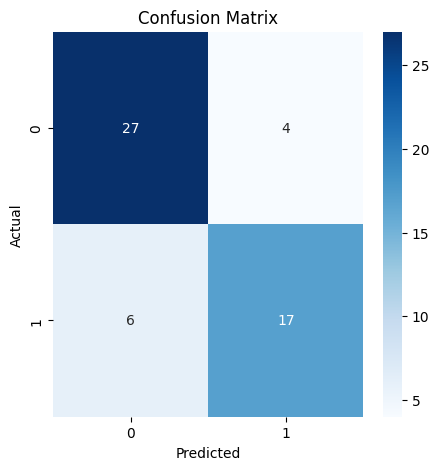

In [132]:
cm = confusion_matrix(y_test, y_pred_known_data)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show() 

The result confirms our model is working correctly and is a high performing model for the League of Legends dataset!